# Catboost Model

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)

Load the clean dataset

In [3]:
df = pd.read_csv("pharmacy_stockout_clean.csv")
df.head()

,pharmacy_id,medicine_id,current_stock_level,avg_weekly_sales,reorder_quantity,lead_time_days,supplier_delay_frequency,price_change_rate,storage_capacity,pharmacy_location_code,medicine_category,target_stockout
0,82,46,41,34,45,13,0.80,-0.00,359,9,Painkiller,0
1,42,7,192,13,80,6,0.65,0.13,322,13,Cardiology,0
2,68,26,79,17,62,1,0.55,0.08,242,4,Cardiology,0
3,68,13,180,14,30,14,0.26,0.01,296,8,Antibiotic,0
4,44,28,171,44,71,13,0.58,0.10,101,2,Vitamins,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pharmacy_id               1000 non-null   int64  
 1   medicine_id               1000 non-null   int64  
 2   current_stock_level       1000 non-null   int64  
 3   avg_weekly_sales          1000 non-null   int64  
 4   reorder_quantity          1000 non-null   int64  
 5   lead_time_days            1000 non-null   int64  
 6   supplier_delay_frequency  1000 non-null   float64
 7   price_change_rate         1000 non-null   float64
 8   storage_capacity          1000 non-null   int64  
 9   pharmacy_location_code    1000 non-null   int64  
 10  medicine_category         1000 non-null   object 
 11  target_stockout           1000 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 93.9+ KB


In [5]:
df['target_stockout'].value_counts()

,count
target_stockout,
0,738
1,262


Defining categorical Feature For Catboost



*   no encoding will be applied
*   catboost handle them internally using target statistics
    > this is a core catboost advantage





In [10]:
cat_features = [
    'pharmacy_id',
    'medicine_id',
    'medicine_category',
    'pharmacy_location_code'
]

In [11]:
X = df.drop(columns=['target_stockout']) #features that will be used as input
y = df['target_stockout'] # target (what the model predicts)

Train–Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [13]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 11)
X_test shape: (200, 11)
y_train shape: (800,)
y_test shape: (200,)


initalize CatBoost Model

In [25]:
cat_model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    verbose=1,
    random_seed=42
)


train the model

In [15]:
cat_model.fit(X_train, y_train)


0:	learn: 0.4783863	total: 67ms	remaining: 20s
1:	learn: 0.3642009	total: 86.2ms	remaining: 12.8s
2:	learn: 0.2610706	total: 99.1ms	remaining: 9.81s
3:	learn: 0.1969910	total: 112ms	remaining: 8.31s
4:	learn: 0.1557623	total: 120ms	remaining: 7.1s
5:	learn: 0.1166752	total: 125ms	remaining: 6.14s
6:	learn: 0.0889548	total: 130ms	remaining: 5.44s
7:	learn: 0.0812355	total: 132ms	remaining: 4.83s
8:	learn: 0.0695099	total: 137ms	remaining: 4.44s
9:	learn: 0.0555373	total: 142ms	remaining: 4.13s
10:	learn: 0.0428883	total: 147ms	remaining: 3.86s
11:	learn: 0.0368438	total: 152ms	remaining: 3.64s
12:	learn: 0.0330284	total: 157ms	remaining: 3.46s
13:	learn: 0.0275474	total: 161ms	remaining: 3.29s
14:	learn: 0.0218577	total: 164ms	remaining: 3.12s
15:	learn: 0.0190719	total: 169ms	remaining: 3s
16:	learn: 0.0161434	total: 174ms	remaining: 2.89s
17:	learn: 0.0142372	total: 178ms	remaining: 2.79s
18:	learn: 0.0132220	total: 180ms	remaining: 2.67s
19:	learn: 0.0118255	total: 185ms	remaining: 2

# Evalution
make predication

*   apply the trained model to unseen data
*   outputs predicted stock-out labels (0 or 1)



In [16]:
y_pred = cat_model.predict(X_test)

In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0])

# Model Evaluation
-------------

In [18]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


In [19]:
# classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       148
           1       1.00      1.00      1.00        52

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



precision → how accurate predictions are

recall → how many stock-outs were detected

F1-score → balance between them

In [21]:
# confusion matrix (shows correct vs incorrect prediction)
cm = confusion_matrix(y_test, y_pred)
cm

array([[148,   0],
       [  0,  52]])

This Section Proves That the Model is not OVERFITTING

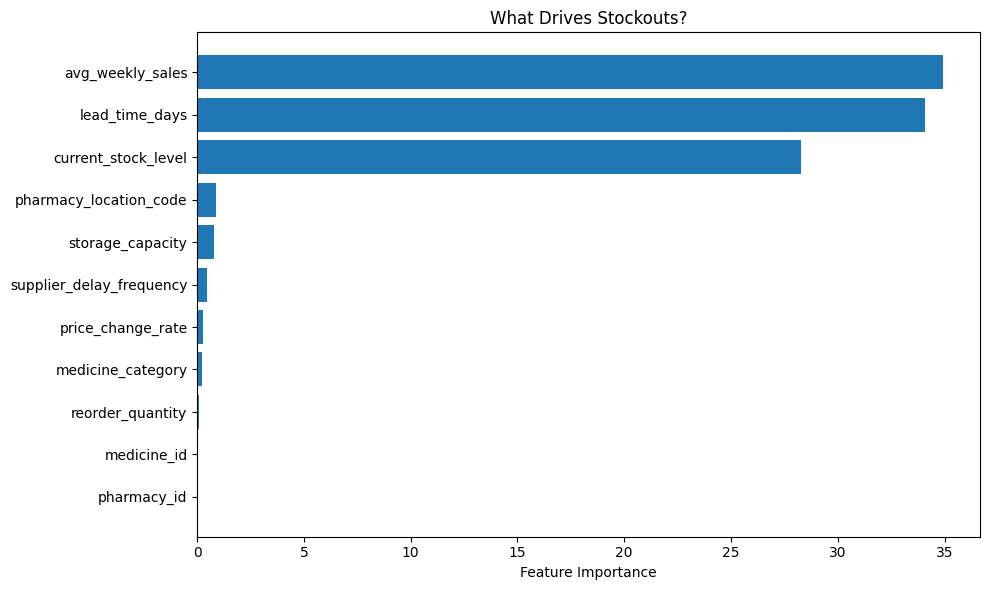

In [22]:
importance = cat_model.get_feature_importance()
feature_names = X.columns
sorted_idx = importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('What Drives Stockouts?')
plt.tight_layout()
plt.show()

In [24]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': cat_model.get_feature_importance()
}).sort_values(by='importance', ascending=False)

feature_importance


,feature,importance
3,avg_weekly_sales,34.916644
5,lead_time_days,34.092464
2,current_stock_level,28.284210
9,pharmacy_location_code,0.885552
8,storage_capacity,0.775974
6,supplier_delay_frequency,0.453098
7,price_change_rate,0.258884
10,medicine_category,0.233489
4,reorder_quantity,0.099684
1,medicine_id,0.000000
